In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import os

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'font.size': 20,
        'figure.figsize': (10, 7),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })


In [2]:
def mann_whitney(column):
    x1 = data.loc[data['Revenue'] == 0, column]
    x2 = data.loc[data['Revenue'] != 0, column]
    stat, p_value = stats.mannwhitneyu(x1, x2)
    return stat, p_value

In [3]:
def custom_binning(col, bin_edges, include_zero):
    bin_values = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])].shape[0]
        for i in range(len(bin_edges) - 1)
    ]
    bin_values_pos = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])
             & (data['Revenue'] > 0)].shape[0]
        for i in range(len(bin_edges) - 1)
    ]

    if (include_zero):
        bin_values = [data[data[col] == 0].shape[0]] + bin_values
        bin_values_pos = [
            data[(data[col] == 0)
                 & (data['Revenue'] > 0)].shape[0]
        ] + bin_values_pos

    return (np.array(bin_values_pos) / np.array(bin_values))

In [4]:
def bin_errors(col, bin_edges, include_zero):
    bin_values = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])].shape[0]
        for i in range(len(bin_edges) - 1)
    ]
    bin_values_pos = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])
             & (data['Revenue'] > 0)].shape[0]
        for i in range(len(bin_edges) - 1)
    ]

    if (include_zero):
        bin_values = [data[data[col] == 0].shape[0]] + bin_values
        bin_values_pos = [
            data[(data[col] == 0)
                 & (data['Revenue'] > 0)].shape[0]
        ] + bin_values_pos
    
    sigma_tot = np.sqrt(bin_values)
    sigma_pos = np.sqrt(bin_values_pos)
    corr = np.corrcoef(bin_values, bin_values_pos)[0, 1]
    # derivation by positive value in bins
    df_dv_pos = 1 / np.array(bin_values)
    df_dv_tot = -np.array(bin_values_pos) / np.square(np.array(bin_values))
    
    errors = np.sqrt(np.square(df_dv_pos * sigma_pos) + np.square(df_dv_tot * sigma_tot)\
        + (corr * sigma_pos * sigma_tot * df_dv_tot * df_dv_pos)) 
        
    return errors

# Dataset description

Online Shoppers Purchasing Intention Dataset

The Revenue attribute can be used as the class label.

Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The Bounce Rate, Exit Rate and Page Value features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The Special Day feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Link to the description of the original dataset
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# 1. Load data

In [5]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
print(f'Data consists of {data.shape[1]} columns and {data.shape[0]} rows')

Data consists of 18 columns and 12330 rows


## 1.1 First look at data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
data.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


In [10]:
initial_data_types = data.dtypes.value_counts()
for i in initial_data_types.index:
    print(f'{data.dtypes[data.dtypes == i].shape[0]} {i} columns')

7 float64 columns
7 int64 columns
2 bool columns
2 object columns


Target column 'Revenue' has type bool. Transform it to integer right away <br>
Also transform 'Weekend' column

In [11]:
data['Revenue'] = data['Revenue'].astype(np.int8)
data['Weekend'] = data['Weekend'].astype(np.int8)

In [12]:
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

Data is unbalanced

## 1.2 Handle missed values

In [13]:
data.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    491
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [14]:
for col in data.columns[data.isnull().sum() > 0]:
    print(col, 'missing values')
    print(f"{round((data[col].isnull().sum() / data.shape[0]) * 100, 3)} %")

Informational_Duration missing values
1.614 %
ProductRelated_Duration missing values
3.982 %
ExitRates missing values
0.803 %


In [15]:
data.dtypes[data.isnull().sum() > 0]

Informational_Duration     float64
ProductRelated_Duration    float64
ExitRates                  float64
dtype: object

Data has 3 columns with missing values with type 'float'. <br>
Simple solutions for this type of data is to:
* replace NaNs with mean value of column
* replace NaNs with median value (if distribution has heavy tail)

--------------------------------------------------
Informational_Duration
median   = 0.0
mean     = 34.72450155416108
skewness = 7.543068097422117
--------------------------------------------------
ProductRelated_Duration
median   = 597.625
mean     = 1190.534914064685
skewness = 7.393584199422583
--------------------------------------------------
ExitRates
median   = 0.025141026
mean     = 0.04302104039784155
skewness = 2.1536554821516662
--------------------------------------------------


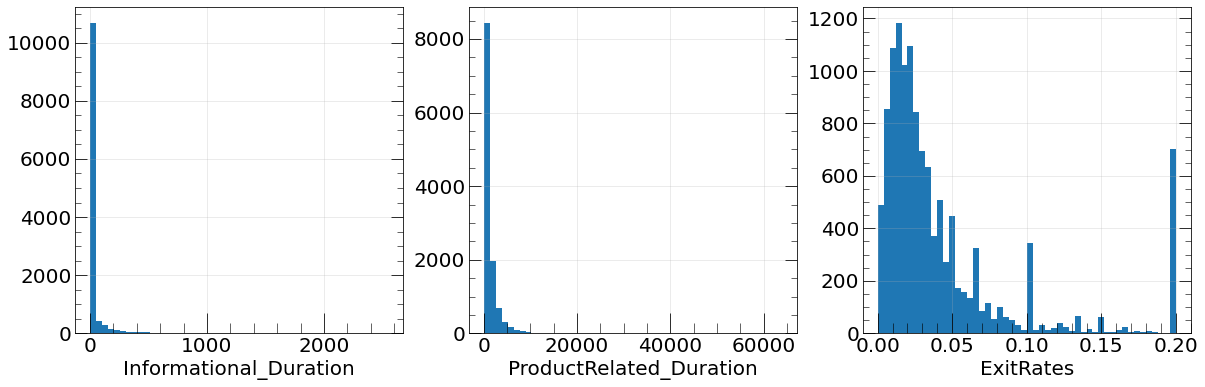

In [16]:
print('-'*50)
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(data.columns[data.isnull().sum() > 0]):
    print(col)
    print(f"median   = {data[col].median()}")
    print(f"mean     = {data[col].mean()}")
    print(f"skewness = {stats.skew(data[col].dropna())}")
    print('-'*50)
    ax[i].hist(data[col], bins=50)
    ax[i].set_xlabel(col)

Inference: <br>
Distributions of all three features have very long right tails (i.e. skewness >> 0). <br>
Better to replace missing values with medians

In [17]:
for col in data.columns[data.isna().sum() > 0]:
    data[col].fillna(data[col].median(), inplace=True)

# Outliers

# 2. EDA

In [18]:
import scipy.stats as stats

In [19]:
num_cols = data.columns[data.dtypes != object]
num_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')

## 2.1. Numeric columns

### 2.1.1. Administrative

Administrative -> int64
Mann-Whitney p-value = 6.559658546264956e-78


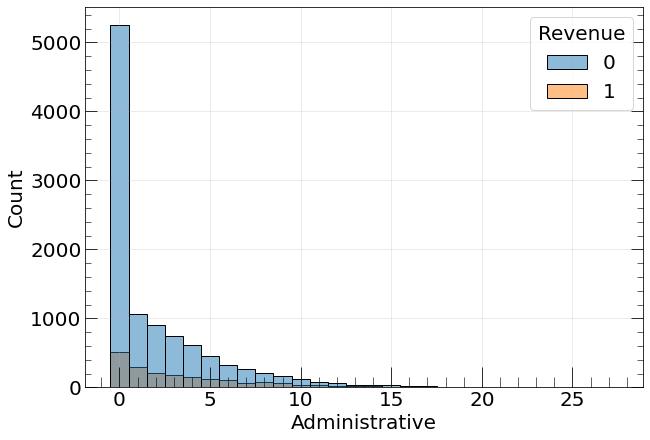

In [20]:
print('Administrative ->', data['Administrative'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Administrative')[1]}")
sns.histplot(data=data,
             x='Administrative',
             hue="Revenue",
             multiple="layer",
             discrete=True)
plt.show()

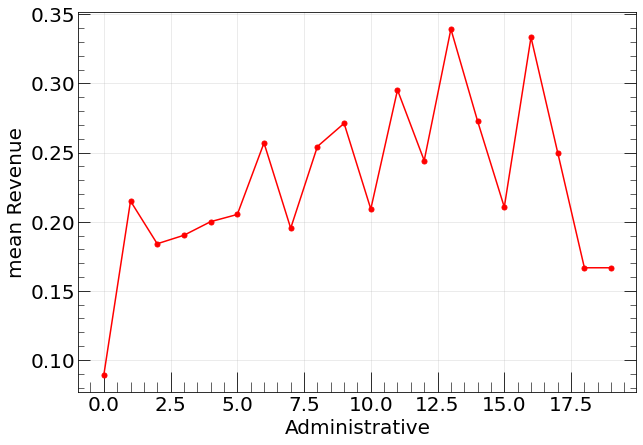

In [21]:
def plot_mean_revenue(col, range_high, range_low):
    points = data.loc[(data[col] < range_high) & (data[col] > range_low)]\
        .groupby(col).agg(MeanRevenue=('Revenue', 'mean'))
    plt.plot(points, 'o-r')
    plt.xlabel(col)
    plt.ylabel('mean Revenue')
    plt.show()
    

plot_mean_revenue('Administrative', 20, -1)

In [176]:
print('Mean revenue among objects with Administrative_duration = 0:',
      round(data.loc[data['Administrative'] == 0, ['Revenue']].mean().values[0], 4),
      sep='\n')
print('Mean revenue among objects with Administrative_duration != 0:',
      round(data.loc[data['Administrative'] != 0, ['Revenue']].mean().values[0], 4),
      sep='\n')

Mean revenue among objects with Administrative_duration = 0:
0.0891
Mean revenue among objects with Administrative_duration != 0:
0.2124


### Administrative_Duration

Administrative_Duration -> float64
Mann-Whitney p-value = 2.3361304523849337e-74


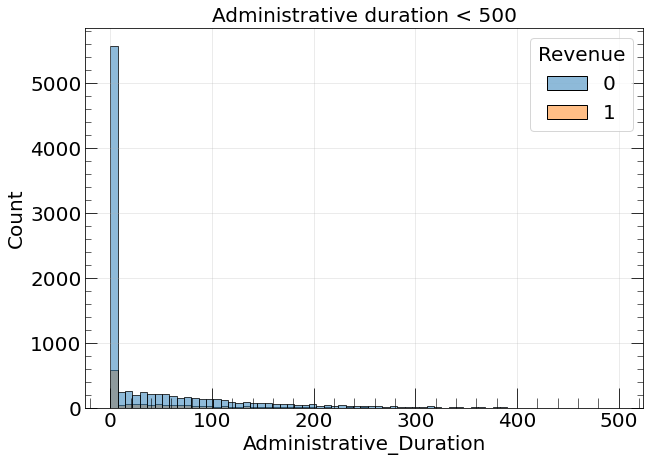

In [22]:
print('Administrative_Duration ->', data['Administrative_Duration'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Administrative_Duration')[1]}")
sns.histplot(data=data[data['Administrative_Duration'] < 500],
             x='Administrative_Duration',
             hue="Revenue",
             multiple="layer")
plt.title('Administrative duration < 500')
plt.show()

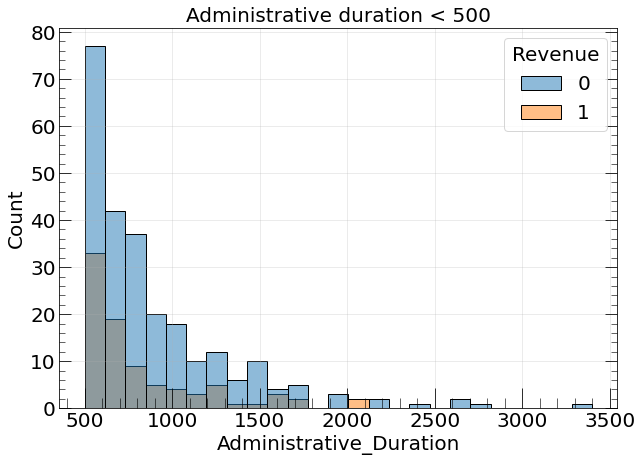

In [23]:
plt.title('Administrative duration < 500')
sns.histplot(data=data[data['Administrative_Duration'] >= 500],
             x='Administrative_Duration',
             hue="Revenue",
             multiple="layer")
plt.show()

In [24]:
data[data['Administrative_Duration'] == 0].shape[0] / data.shape[0]

0.4787510137875101

In [25]:
print('Mean revenue among objects with Administrative_duration = 0:',
      round(data.loc[data['Administrative_Duration'] == 0, ['Revenue']].mean().values[0], 4),
      sep='\n')
print('Mean revenue among objects with Administrative_duration != 0:',
      round(data.loc[data['Administrative_Duration'] != 0, ['Revenue']].mean().values[0], 4),
      sep='\n')

Mean revenue among objects with Administrative_duration = 0:
0.0928
Mean revenue among objects with Administrative_duration != 0:
0.2116


~48% of objects have Administrative_Duration = 0. We clearly see that revenue among them are lower. <br>
But is it a trend?

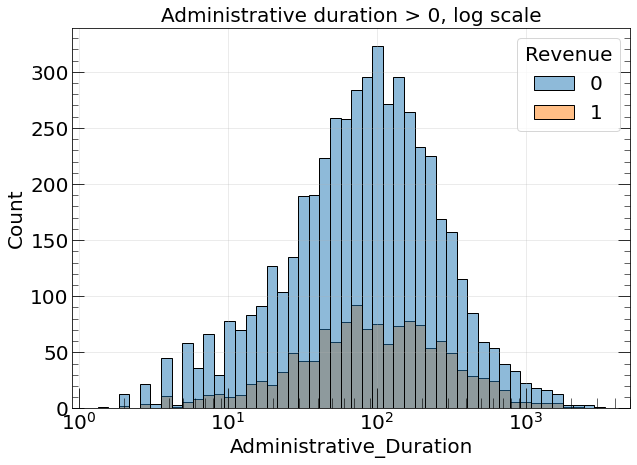

In [26]:
sns.histplot(data=data[data['Administrative_Duration'] > 0],
             x='Administrative_Duration',
             hue="Revenue",
             multiple="layer",
             log_scale=True)
plt.title('Administrative duration > 0, log scale')
plt.show()

In [27]:
bin_edges = [i*10 for i in range(10)] + [i*10 for i in range(10, 20, 2)] + \
    [i*10 for i in range(20, 30, 5)] + [i*10 for i in range(30, 50, 10)] + [500, 3500]
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

In [28]:
bin_values = custom_binning('Administrative_Duration', bin_edges, include_zero=True)
bin_centers = [0] + bin_centers

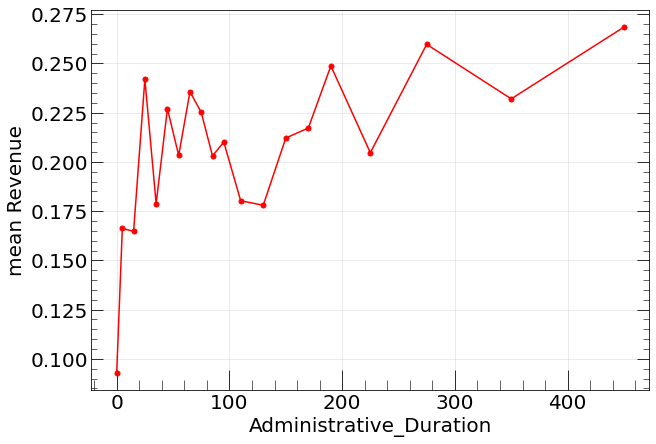

In [29]:
plt.plot(bin_centers[:-1], bin_values[:-1], 'o-r')
plt.xlabel('Administrative_Duration')
plt.ylabel('mean Revenue')
plt.show()

In [31]:
data[['Administrative', 'Administrative_Duration']].corr()

,Administrative,Administrative_Duration
Administrative,1.000000,0.601583
Administrative_Duration,0.601583,1.000000


Inference: <br>
* There are significant difference in chances of 'Revenue' between users with 'Administrative' or 'Administrative_dureation' equals 0 and not equals 0. 
* It seems like there is mild linear trend (k is close to 0).
* May be we can transform these features to binary (0, 1)
* Two features are highly correlated (corr ~0.6)

### 2.1.2 Informational

Informational -> int64
Mann-Whitney p-value = 6.013906980370946e-37


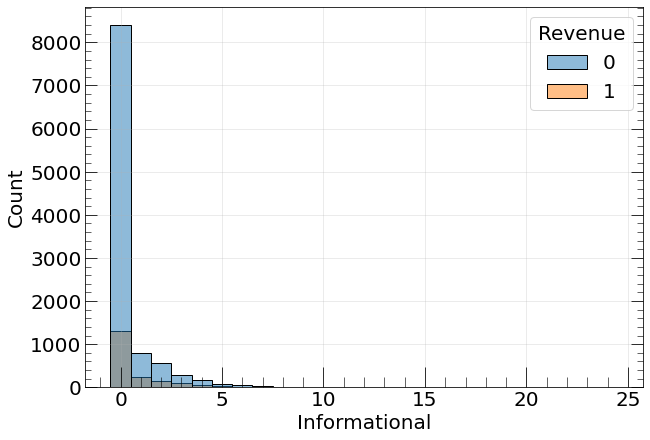

In [32]:
print('Informational ->', data['Informational'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Informational')[1]}")
sns.histplot(data=data,
             x='Informational',
             hue="Revenue",
             multiple="layer",
             discrete=True)

plt.show()

In [33]:
data['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
24       1
16       1
11       1
13       1
Name: Informational, dtype: int64

In [49]:
print('Mean revenue among objects with Informational = 0:',
      round(data.loc[data['Informational'] == 0, ['Revenue']].mean().values[0], 4),
      sep='\n')
print('Mean revenue among objects with Informational != 0:',
      round(data.loc[data['Informational'] != 0, ['Revenue']].mean().values[0], 4),
      sep='\n')

Mean revenue among objects with Informational = 0:
0.1335
Mean revenue among objects with Informational != 0:
0.233


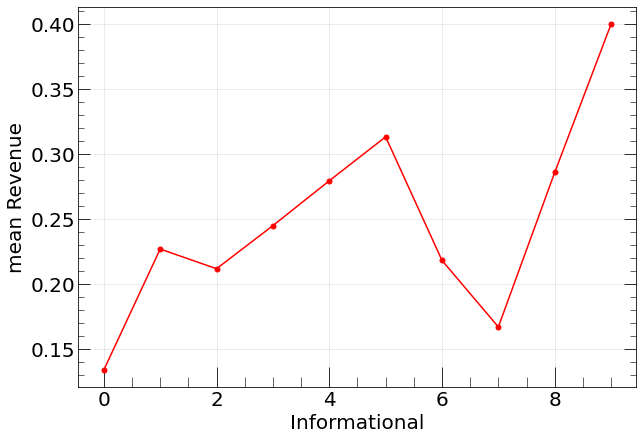

In [34]:
plot_mean_revenue('Informational', 10, -1)

### Informational Duration

Informational_Duration -> float64
Mann-Whitney p-value = 4.7750027212224915e-35


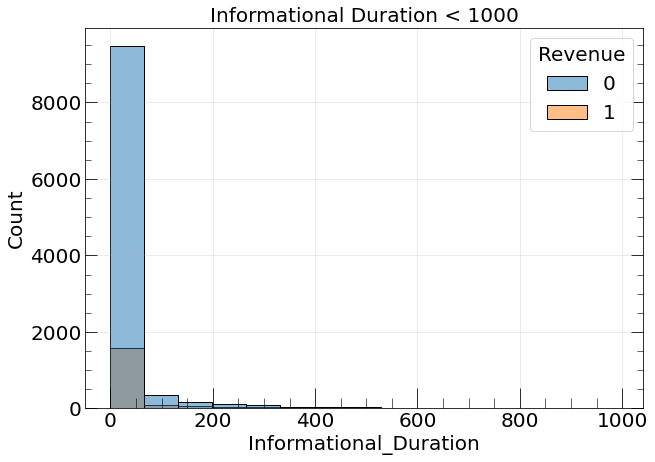

In [35]:
print('Informational_Duration ->', data['Informational_Duration'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Informational_Duration')[1]}")
sns.histplot(data=data[data['Informational_Duration'] < 1000],
             x='Informational_Duration',
             hue="Revenue",
             multiple="layer")
plt.title('Informational Duration < 1000')
plt.show()

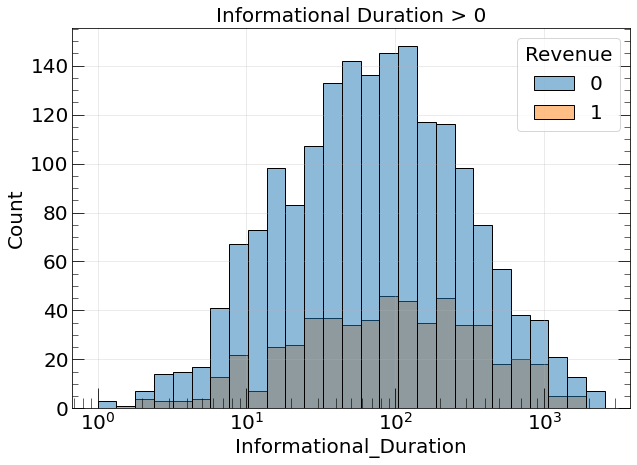

In [41]:
sns.histplot(data=data[(data['Informational_Duration'] > 0)],
             x='Informational_Duration',
             hue="Revenue",
             multiple="layer",
             log_scale=True)
plt.title('Informational Duration > 0')
plt.show()

In [45]:
bin_edges = [i*50 for i in range(10)] + [i*100 for i in range(5, 10)] + [1000, 3000]
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]
bin_centers = [0] + bin_centers

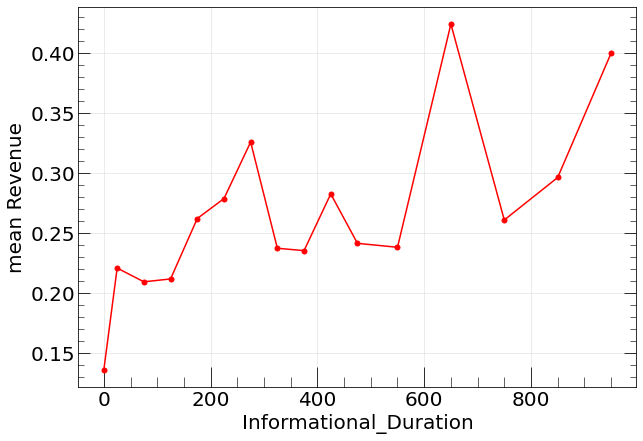

In [46]:
bin_values = custom_binning('Informational_Duration', bin_edges, include_zero=True)
plt.plot(bin_centers[:-1], bin_values[:-1], 'o-r')
plt.xlabel('Informational_Duration')
plt.ylabel('mean Revenue')
plt.show()

In [51]:
data[['Informational', 'Informational_Duration']].corr()

,Informational,Informational_Duration
Informational,1.000000,0.616051
Informational_Duration,0.616051,1.000000


Inference (very similar to Administratve* features): <br>
* There are significant difference in chances of 'Revenue' between users with 'Informational' or 'Informational_dureation' equals 0 and not equals 0.
* May be we can transform these features to binary (0, 1)
* Two features are highly correlated (corr ~0.62)

### 2.1.3 Product Related

ProductRelated -> int64
Mann-Whitney p-value = 5.262192886345497e-108


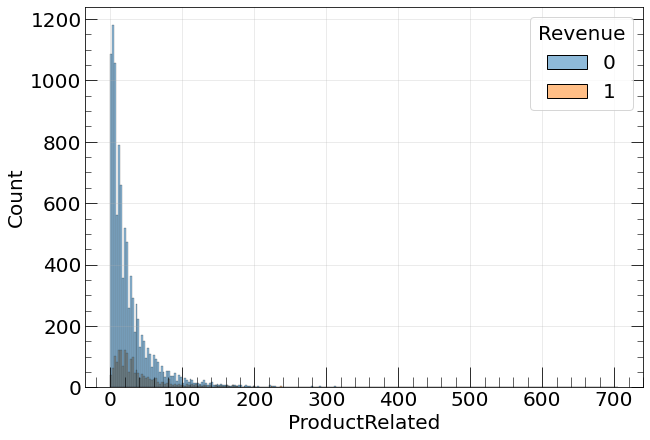

In [53]:
print('ProductRelated ->', data['ProductRelated'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('ProductRelated')[1]}")
sns.histplot(data=data,
             x='ProductRelated',
             hue="Revenue",
             multiple="layer")
plt.show()

In [54]:
print(f"Mean Revenue for objects with ProductRelated = 0: {data.loc[data['ProductRelated'] == 0, ['Revenue']].mean()[0]}")
print(f"Mean Revenue for objects with ProductRelated > 0: {data.loc[data['ProductRelated'] > 0, ['Revenue']].mean()[0]}")

Mean Revenue for objects with ProductRelated = 0: 0.15789473684210525
Mean Revenue for objects with ProductRelated > 0: 0.15473478685323788


Opposite to 'Adinistrative' and 'Informational' (also their durations) there is no significant difference between mean Revenue for zero vlaues and non-zero values

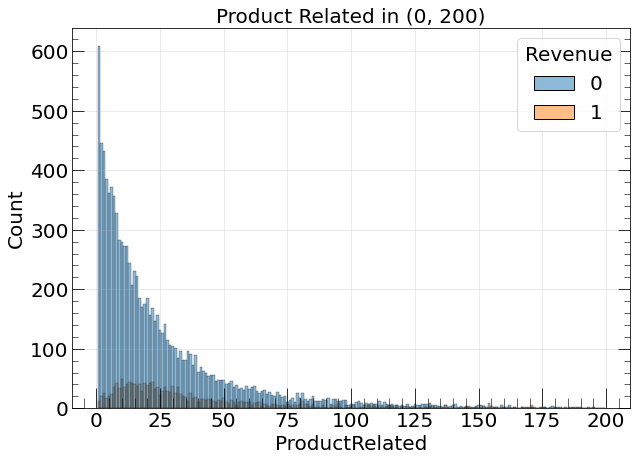

In [55]:
sns.histplot(data=data[(data['ProductRelated'] > 0) & (data['ProductRelated'] < 200)],
             x='ProductRelated',
             hue="Revenue",
             multiple="layer",
             discrete=True)
plt.title('Product Related in (0, 200)')
plt.show()

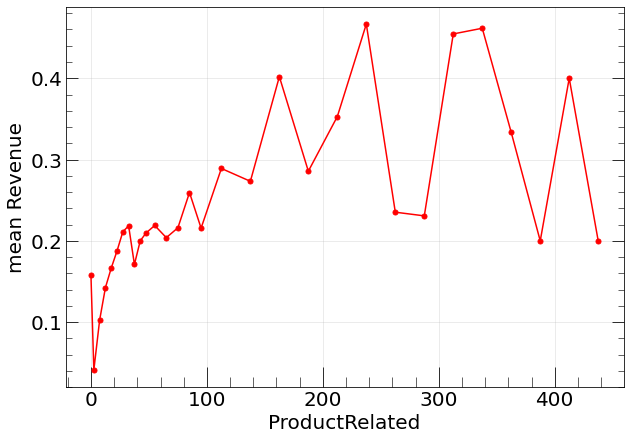

In [56]:
bin_edges = [i*5 for i in range(10)] + [i*10 for i in range(5, 11)] + [i*25 for i in range(5, 20)] + [700]
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

bin_values = custom_binning("ProductRelated", bin_edges, include_zero=True)
bin_centers = [0] + bin_centers
plt.plot(bin_centers[:-2], bin_values[:-2], 'o-r')
plt.xlabel('ProductRelated')
plt.ylabel('mean Revenue')
plt.show()

In [57]:
from scipy.optimize import curve_fit

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


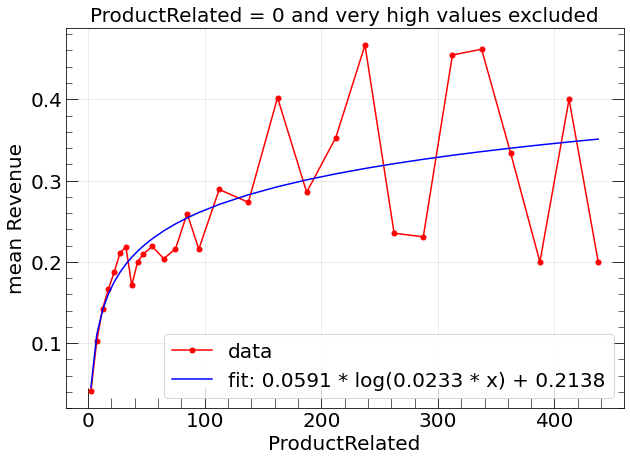

Log function: 0.0591 * log(0.0233 * x) + 0.2138


In [58]:
def log_func(x, a, b, c):
    return b * np.log(a * x) + c

x = np.array(bin_centers[1:-2])
y = np.array(bin_values[1:-2])
y_err = bin_errors("ProductRelated", bin_edges, include_zero=True)[1:-2]

popt = curve_fit(log_func, x, y)[0]
popt_round = list(map(lambda x: round(x, 4), popt))
popt_description = f'{popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}'

plt.plot(x, y, 'o-r', label='data')
plt.plot(x, log_func(x, *popt), 'b-', label='fit: '+popt_description)
plt.xlabel('ProductRelated')
plt.ylabel('mean Revenue')
plt.title('ProductRelated = 0 and very high values excluded')
plt.legend()
plt.show()

print(f'Log function: {popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}')

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


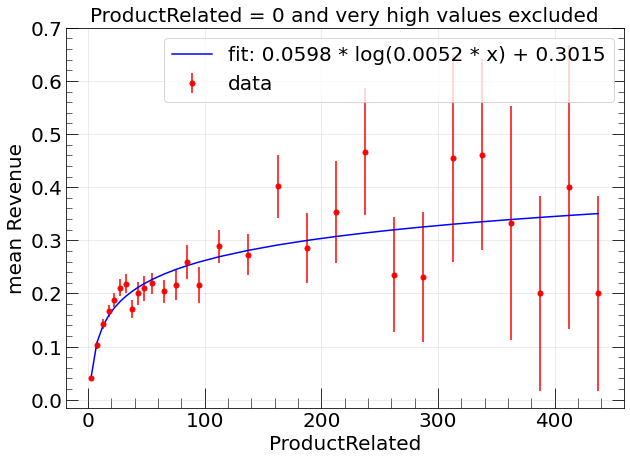

Log function: 0.0598 * log(0.0052 * x) + 0.3015


In [60]:
x = np.array(bin_centers[1:-2])
y = np.array(bin_values[1:-2])
y_err = bin_errors("ProductRelated", bin_edges, include_zero=True)[1:-2]

popt = curve_fit(log_func, x, y, sigma=y_err)[0]
popt_round = list(map(lambda x: round(x, 4), popt))
popt_description = f'{popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}'

plt.errorbar(x, y, yerr=y_err, label='data', c='r', fmt='o')
plt.plot(x, log_func(x, *popt), 'b-', label='fit: '+popt_description)
plt.xlabel('ProductRelated')
plt.ylabel('mean Revenue')
plt.title('ProductRelated = 0 and very high values excluded')
plt.legend()
plt.show()

print(f'Log function: {popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}')

### ProductRelated Duration

ProductRelated_Duration -> float64
Mann-Whitney p-value = 3.610801854133084e-120


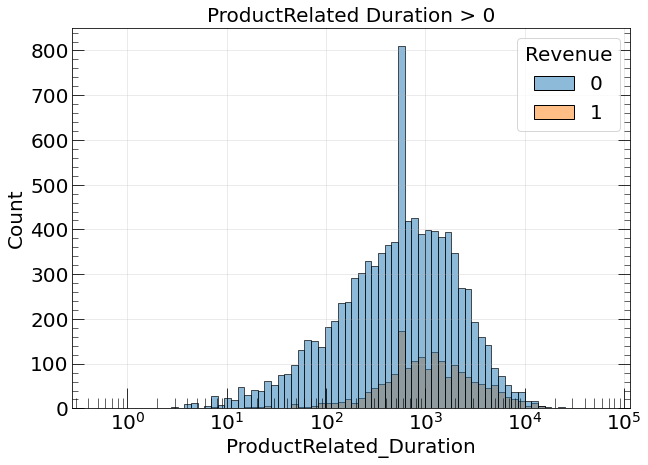

In [64]:
print('ProductRelated_Duration ->', data['ProductRelated_Duration'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('ProductRelated_Duration')[1]}")
sns.histplot(data=data[data['ProductRelated_Duration'] > 0],
             x='ProductRelated_Duration',
             hue="Revenue",
             multiple="layer",
             log_scale=True)
plt.title('ProductRelated Duration > 0')
plt.show()

In [86]:
print(
    f"Mean Revenue for objects with ProductRelated Duration = 0: {data.loc[data['ProductRelated_Duration'] == 0, ['Revenue']].mean()[0]}"
)
print(
    f"Mean Revenue for objects with ProductRelated Duration > 0: {data.loc[data['ProductRelated_Duration'] > 0, ['Revenue']].mean()[0]}"
)

Mean Revenue for objects with ProductRelated Duration = 0: 0.01662049861495845
Mean Revenue for objects with ProductRelated Duration > 0: 0.1633356305995865


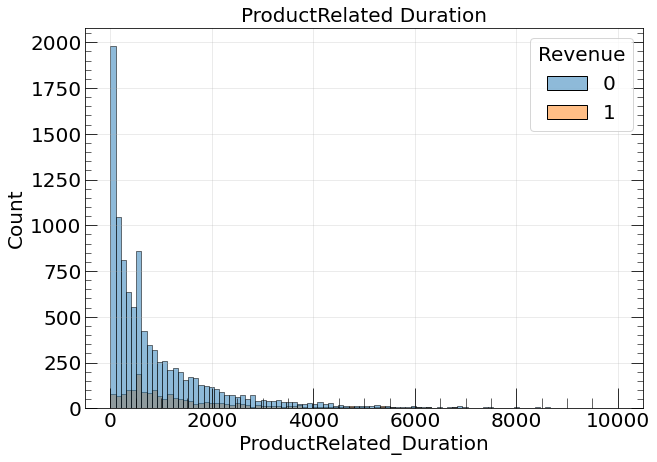

In [67]:
sns.histplot(data=data[data['ProductRelated_Duration'] < 10000],
             x='ProductRelated_Duration',
             hue="Revenue",
             multiple="layer")
plt.title('ProductRelated Duration')
plt.show()

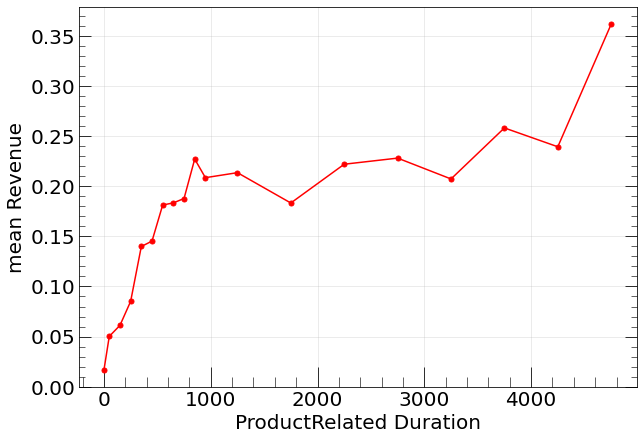

In [77]:
bin_edges = [i*100 for i in range(10)] + [i*500 for i in range(2, 13)]
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

bin_values = custom_binning("ProductRelated_Duration", bin_edges, include_zero=True)
bin_centers = [0] + bin_centers
plt.plot(bin_centers[:-2], bin_values[:-2], 'o-r')
plt.xlabel('ProductRelated Duration')
plt.ylabel('mean Revenue')
plt.show()

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


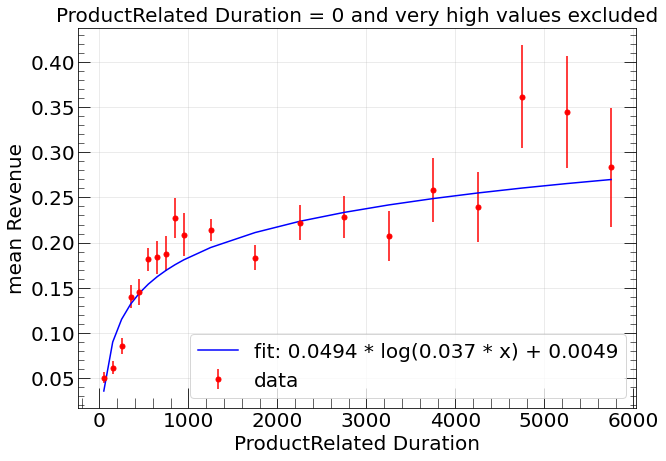

Log function: 0.0494 * log(0.037 * x) + 0.0049


In [82]:
x = np.array(bin_centers[1:])
y = np.array(bin_values[1:])
y_err = bin_errors("ProductRelated_Duration", bin_edges, include_zero=False)

popt = curve_fit(log_func, x, y, sigma=y_err)[0]
popt_round = list(map(lambda x: round(x, 4), popt))
popt_description = f'{popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}'

plt.errorbar(x, y, yerr=y_err, label='data', c='r', fmt='o')
plt.plot(x, log_func(x, *popt), 'b-', label='fit: '+popt_description)
plt.xlabel('ProductRelated Duration')
plt.ylabel('mean Revenue')
plt.title('ProductRelated Duration = 0 and very high values excluded')
plt.legend()
plt.show()

print(f'Log function: {popt_round[1]} * log({popt_round[0]} * x) + {popt_round[2]}')

In [85]:
data[['ProductRelated', 'ProductRelated_Duration']].corr()

,ProductRelated,ProductRelated_Duration
ProductRelated,1.000000,0.837086
ProductRelated_Duration,0.837086,1.000000


Inerence:
* Chance of Revenue grows as log with 'ProductRelated' and 'ProductRelated_Duration'
* Two features are highly correlated (~0.84)
* For 'ProductRelated' = 0 mean Revenue is equal to mean Revenue in 'ProductRelated' > 0

<AxesSubplot:>

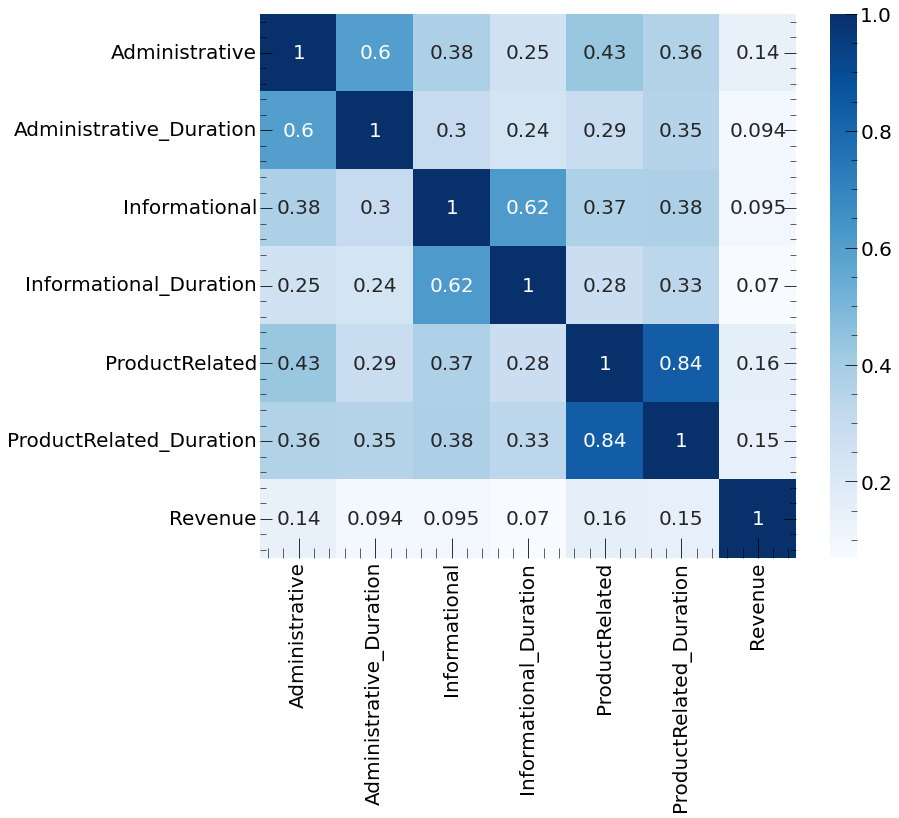

In [97]:
corr = data[[
    "Administrative", "Administrative_Duration", "Informational",
    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
    "Revenue"
]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="Blues", annot=True)

### 2.1.4 BounceRates
The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

BounceRates -> float64
Mann-Whitney p-value = 9.163850295589794e-62


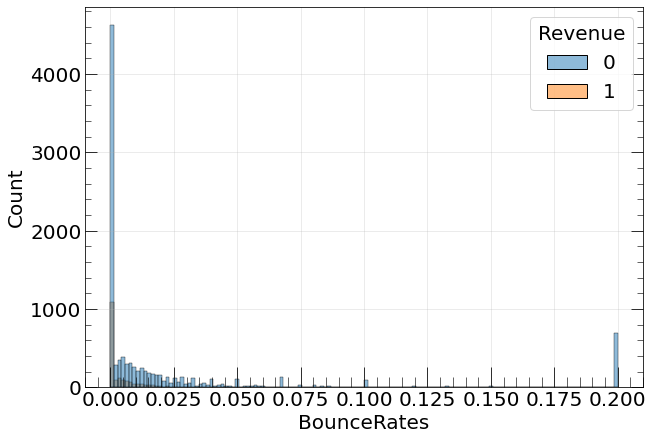

In [98]:
print('BounceRates ->', data['BounceRates'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('BounceRates')[1]}")
sns.histplot(data,
             x='BounceRates',
             hue="Revenue",
             multiple="layer",
             #log_scale=True
            )
#plt.title('ProductRelated Duration > 0')
plt.show()

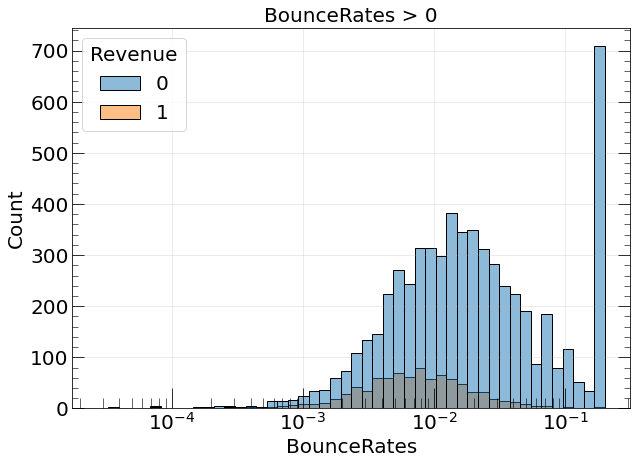

In [111]:
sns.histplot(data[data['BounceRates'] > 0],
             x='BounceRates',
             hue="Revenue",
             multiple="layer",
             log_scale=True
            )
plt.title('BounceRates > 0')
plt.show()

In [99]:
print(
    f"Mean Revenue for objects with BounceRates = 0: {data.loc[data['BounceRates'] == 0, ['Revenue']].mean()[0]}"
)
print(
    f"Mean Revenue for objects with BounceRates > 0: {data.loc[data['BounceRates'] > 0, ['Revenue']].mean()[0]}"
)

Mean Revenue for objects with BounceRates = 0: 0.18774918448713301
Mean Revenue for objects with BounceRates > 0: 0.1280093951849677


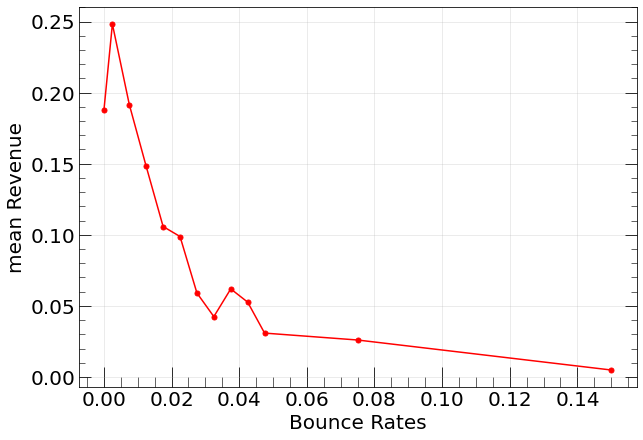

In [110]:
bin_edges = [i*0.005 for i in range(10)] + [i*0.05 for i in range(1, 3)] + [0.2]
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

bin_values = custom_binning("BounceRates", bin_edges, include_zero=True)
bin_centers = [0] + bin_centers
plt.plot(bin_centers, bin_values, 'o-r')
plt.xlabel('Bounce Rates')
plt.ylabel('mean Revenue')
plt.show()

In [182]:
data[data['BounceRates'] > 0.19]['Revenue'].mean()

0.004285714285714286

### 2.1.5 ExitRates
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

ExitRates -> float64
Mann-Whitney p-value = 6.180024662012867e-174


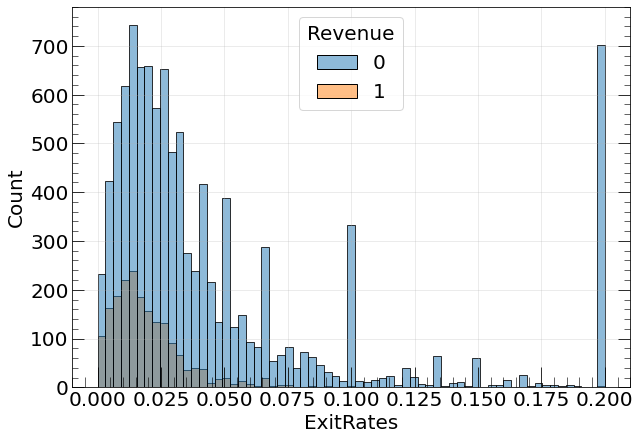

In [112]:
print('ExitRates ->', data['ExitRates'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('ExitRates')[1]}")
sns.histplot(data,
             x='ExitRates',
             hue="Revenue",
             multiple="layer",
             #log_scale=True
            )
plt.show()

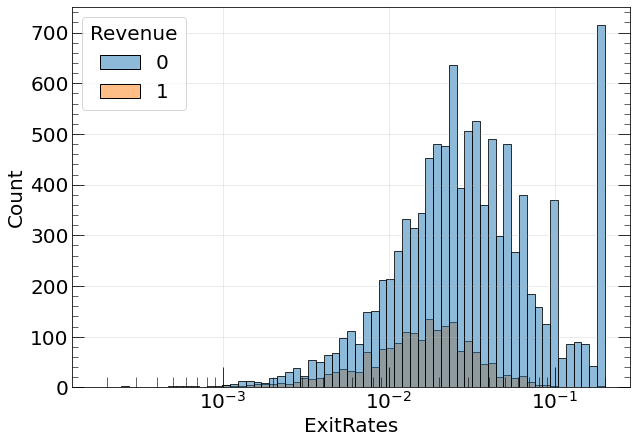

In [190]:
sns.histplot(data[data['ExitRates'] > 0],
             x='ExitRates',
             hue="Revenue",
             multiple="layer",
             log_scale=True
            )
plt.show()

### 2.1.6 PageValues
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

ExitRates -> float64
Mann-Whitney p-value = 0.0


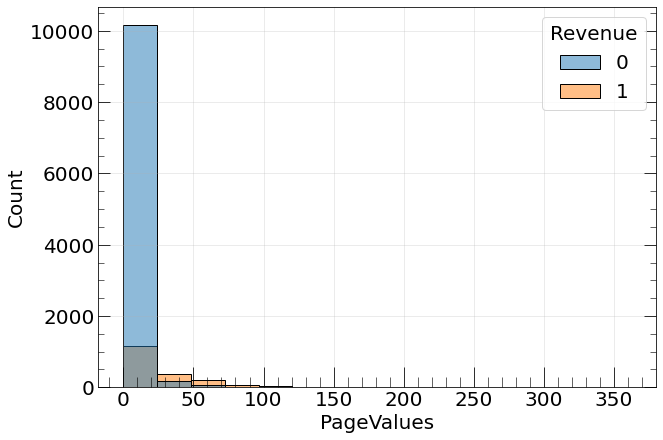

In [117]:
print('ExitRates ->', data['PageValues'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('PageValues')[1]}")
sns.histplot(data,
             x='PageValues',
             hue="Revenue",
             multiple="layer",
             #log_scale=True
            )
#plt.title('ProductRelated Duration > 0')
plt.show()

ExitRates -> float64
Mann-Whitney p-value = 0.0


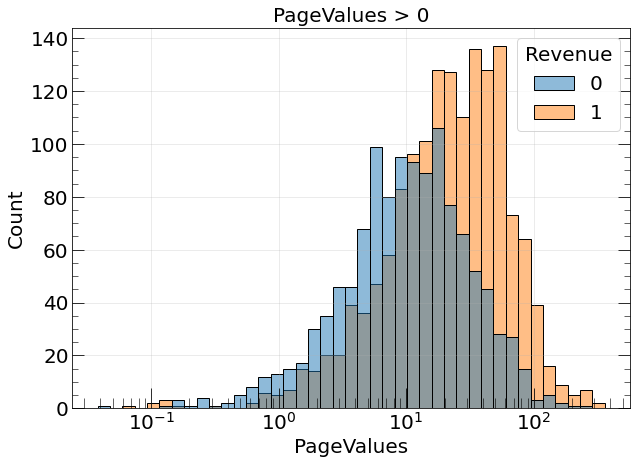

In [118]:
print('ExitRates ->', data['PageValues'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('PageValues')[1]}")
sns.histplot(data[data['PageValues'] > 0],
             x='PageValues',
             hue="Revenue",
             multiple="layer",
             log_scale=True
            )
plt.title('PageValues > 0')
plt.show()

In [119]:
print(
    f"Mean Revenue for objects with PageValues = 0: {data.loc[data['PageValues'] == 0, ['Revenue']].mean()[0]}"
)
print(
    f"Mean Revenue for objects with PageValues > 0: {data.loc[data['PageValues'] > 0, ['Revenue']].mean()[0]}"
)

Mean Revenue for objects with PageValues = 0: 0.03854166666666667
Mean Revenue for objects with PageValues > 0: 0.5633699633699634


<AxesSubplot:>

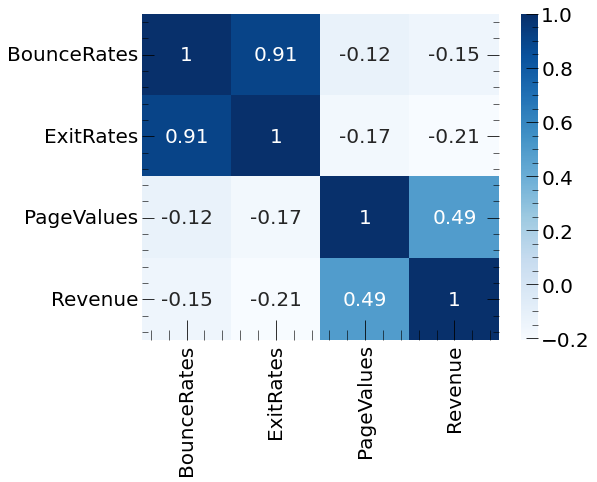

In [191]:
corr = data[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="Blues", annot=True)

### 2.1.7 SpecialDay
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

SpecialDay -> float64
Mann-Whitney p-value = 2.539779818355862e-22


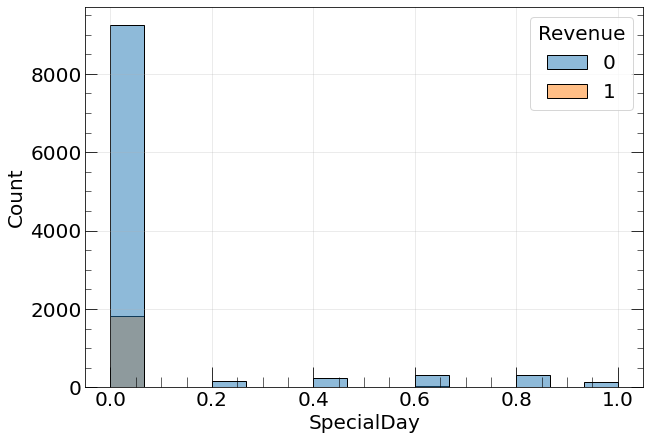

In [130]:
print('SpecialDay ->', data['SpecialDay'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('SpecialDay')[1]}")
sns.histplot(data,
             x='SpecialDay',
             hue="Revenue",
             multiple="layer",
             #log_scale=True
            )
#plt.title('ProductRelated Duration > 0')
plt.show()

In [121]:
print(
    f"Mean Revenue for objects with SpecialDay = 0: {data.loc[data['SpecialDay'] == 0, ['Revenue']].mean()[0]}"
)
print(
    f"Mean Revenue for objects with SpecialDay > 0: {data.loc[data['SpecialDay'] > 0, ['Revenue']].mean()[0]}"
)

Mean Revenue for objects with SpecialDay = 0: 0.16526762343171766
Mean Revenue for objects with SpecialDay > 0: 0.06155075939248601


In [125]:
data.groupby('SpecialDay').agg(MeanRevenue=('Revenue', 'mean'))

,MeanRevenue
SpecialDay,
0.0,0.165268
0.2,0.078652
0.4,0.053498
0.6,0.082621
0.8,0.033846
1.0,0.064935


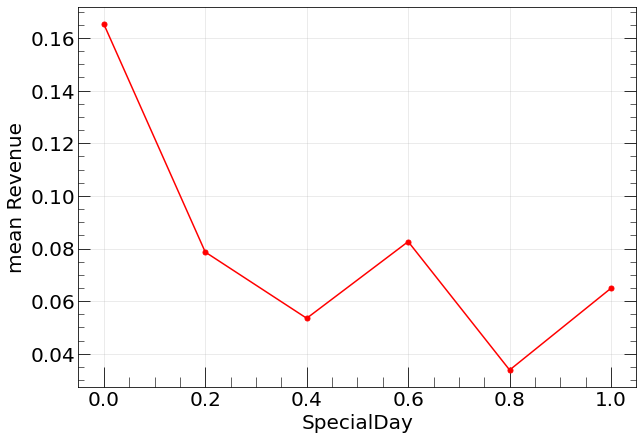

In [128]:
plot_mean_revenue('SpecialDay', 2, -1)

### 2.1.8 OperatingSystems

OperatingSystems -> int64
Mann-Whitney p-value = 0.001204234443435673


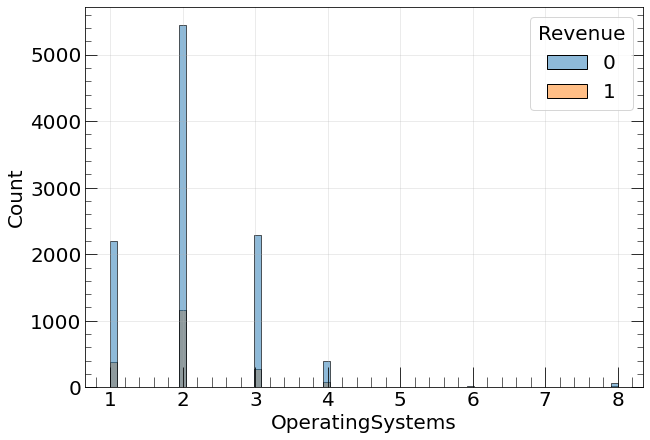

In [131]:
print('OperatingSystems ->', data['OperatingSystems'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('OperatingSystems')[1]}")
sns.histplot(data,
             x='OperatingSystems',
             hue="Revenue",
             multiple="layer")
plt.show()

In [132]:
data.groupby('OperatingSystems').agg(MeanRevenue=('Revenue', 'mean'))

,MeanRevenue
OperatingSystems,
1,0.146615
2,0.174973
3,0.104892
4,0.177824
5,0.166667
6,0.105263
7,0.142857
8,0.215190


### 2.1.9 Browser

Browser -> int64
Mann-Whitney p-value = 0.03573101155043872


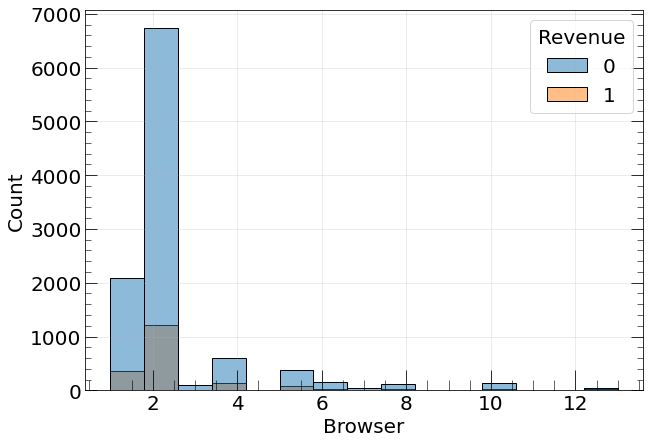

In [133]:
print('Browser ->', data['Browser'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Browser')[1]}")
sns.histplot(data,
             x='Browser',
             hue="Revenue",
             multiple="layer")
plt.show()

In [134]:
data.groupby('Browser').agg(MeanRevenue=('Revenue', 'mean'))

,MeanRevenue
Browser,
1,0.148253
2,0.153624
3,0.047619
4,0.176630
5,0.184154
6,0.114943
7,0.122449
8,0.155556
9,0.000000


### 2.1.10 Region

Region -> int64
Mann-Whitney p-value = 0.050246039043387626


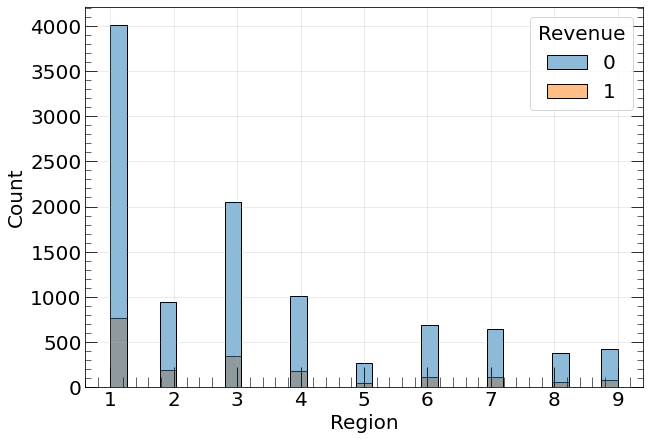

In [136]:
print('Region ->', data['Region'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Region')[1]}")
sns.histplot(data,
             x='Region',
             hue="Revenue",
             multiple="layer")
plt.show()

In [137]:
data.groupby('Region').agg(MeanRevenue=('Revenue', 'mean'))

,MeanRevenue
Region,
1,0.161297
2,0.165493
3,0.145235
4,0.148054
5,0.163522
6,0.139130
7,0.156373
8,0.129032
9,0.168297


### 2.1.11 TrafficType

Region -> int64
Mann-Whitney p-value = 0.4474774867863732


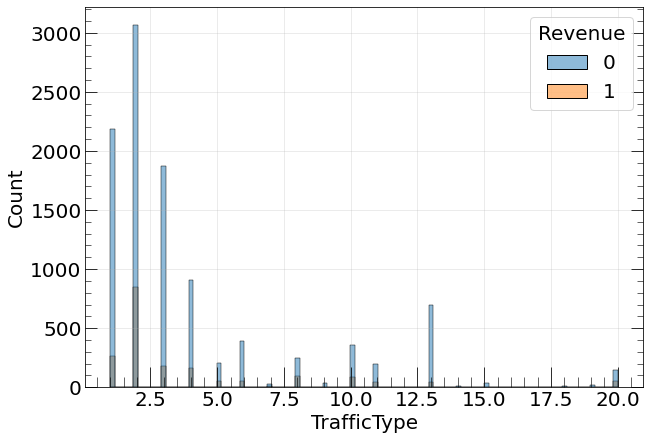

In [139]:
print('TrafficType ->', data['TrafficType'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('TrafficType')[1]}")
sns.histplot(data,
             x='TrafficType',
             hue="Revenue",
             multiple="layer")
plt.show()

In [141]:
data.groupby('TrafficType').agg(MeanRevenue=('Revenue', 'mean'))\
    .sort_values(by='MeanRevenue', ascending=False)

,MeanRevenue
TrafficType,
16,0.333333
7,0.300000
8,0.276968
20,0.252525
2,0.216458
5,0.215385
10,0.200000
11,0.190283
4,0.154350


### 3.1.12 VisitorType

VisitorType -> object
Mann-Whitney p-value = 2.782286773737866e-31


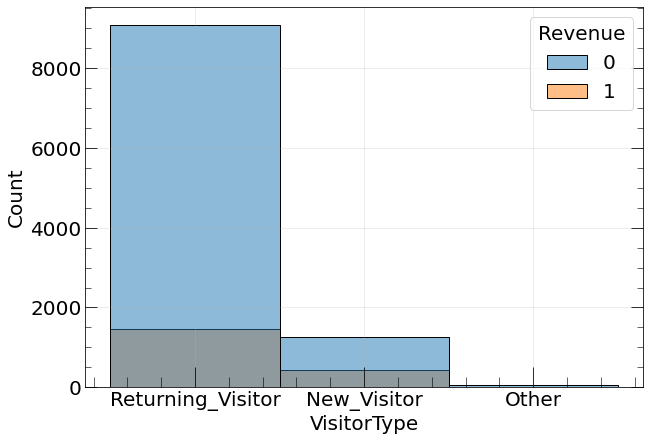

In [142]:
print('VisitorType ->', data['VisitorType'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('VisitorType')[1]}")
sns.histplot(data,
             x='VisitorType',
             hue="Revenue",
             multiple="layer")
plt.show()

In [143]:
data.groupby('VisitorType').agg(MeanRevenue=('Revenue', 'mean'))\
    .sort_values(by='MeanRevenue', ascending=False)

,MeanRevenue
VisitorType,
New_Visitor,0.249115
Other,0.188235
Returning_Visitor,0.139323


### 3.1.13 Weekend

Weekend -> int8
Mann-Whitney p-value = 0.0005712959362102452


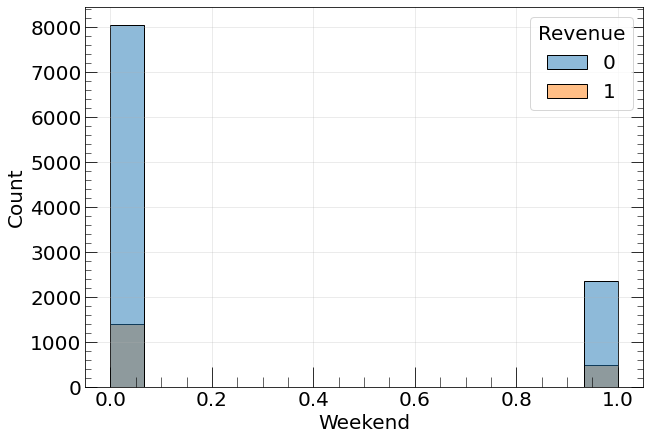

In [144]:
print('Weekend ->', data['Weekend'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Weekend')[1]}")
sns.histplot(data,
             x='Weekend',
             hue="Revenue",
             multiple="layer")
plt.show()

In [146]:
data.groupby('Weekend').agg(MeanRevenue=('Revenue', 'mean'))

,MeanRevenue
Weekend,
0,0.148911
1,0.173989


### 3.1.14 Month

In [152]:
# wtf?
data['Month'].nunique()

11

In [164]:
data_orig = pd.read_csv('online_shoppers_intention_original.csv')
data_orig['Month'].nunique()

10

In [158]:
data['Month'] = data['Month'].replace({'aug': 'Aug'})

In [159]:
data['Month'].nunique()

10

Month -> object
Mann-Whitney p-value = 3.630717779810372e-38


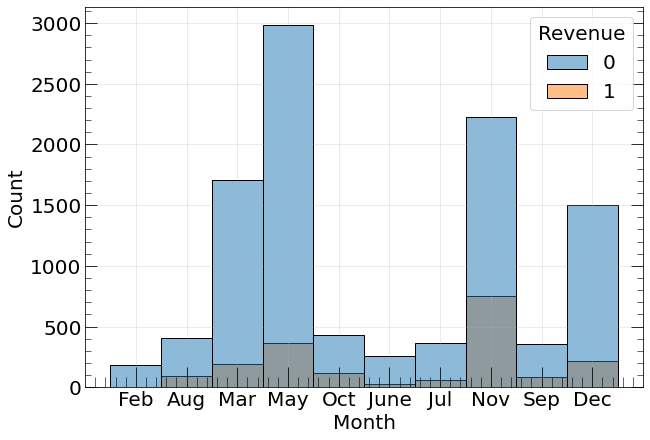

In [160]:
print('Month ->', data['Month'].dtype)
print(f"Mann-Whitney p-value = {mann_whitney('Month')[1]}")
sns.histplot(data,
             x='Month',
             hue="Revenue",
             multiple="layer")
plt.show()

In [162]:
data.groupby('Month').agg(MeanRevenue=('Revenue', 'mean'))\
    .sort_values(by='MeanRevenue', ascending=False)

,MeanRevenue
Month,
Nov,0.252685
Oct,0.211009
Sep,0.192825
Aug,0.183633
Jul,0.149184
Dec,0.124343
May,0.108423
June,0.100694
Mar,0.100158


In [166]:
data_orig.groupby('Month').agg(MeanRevenue=('Revenue', 'mean'))\
    .sort_values(by='MeanRevenue', ascending=False)

,MeanRevenue
Month,
Nov,0.253502
Oct,0.209472
Sep,0.191964
Aug,0.175520
Jul,0.152778
Dec,0.125072
May,0.108502
June,0.100694
Mar,0.100682


### 3.1.15 Target: Revenue

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

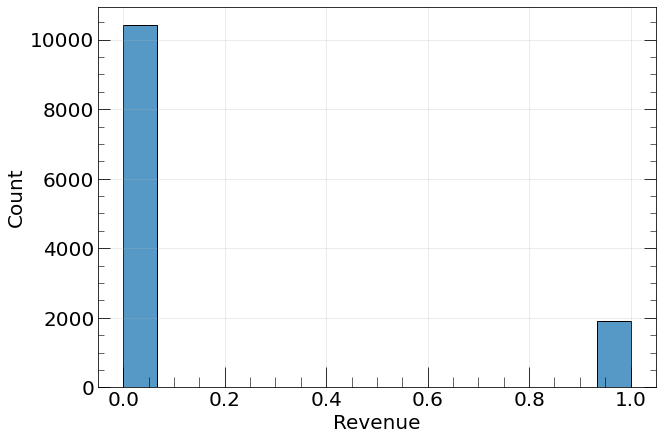

In [170]:
sns.histplot(data['Revenue'])

## Inference

<br>

<font size="3">

We can split into pairs the first six features of dataset. These features represent the number of differen types of pages visited by user during the session and time spent on them. Within every pair features are highly correlated. Also as we will see below they have some corelation among all six vectors.

<u>__'Administrative'__ and __'Administrative_Duration'__</u>
    
   For both this features about a half of values equals 0. 
   * The probability for user to make transaction is more then twice higher if any of this features not 0
   * There are very mild positive linear trend between probability of transaction (mean revenue) and these features
   
   
<u>__'Informational'__ and __'Informational_Duration'__</u>
    
These two features behave very similar to previous pair.


<u>__'ProductRelated'__ and __'ProductRelated_Duration'__</u>
    
Among 3 pairs this is the most correalted wtih target __'Revenue'__ and shows slightly different behaviour with respect to it. Chance to get __'Revenue'__ logarithmically grow with increase of both of these features.
    
<u>__'BounceRates'__</u>
    
"Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. <br>
As expected the higher values of __'BounceRates'__ correspond to lower chances of getting revenue. The highest value of "Bounce Rate" attributed to 700 hundred objects and they have lamost zero probability of revenue.
    
    
<u>__'ExitRates'__</u>
    
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.<br>
These fature has stron correlation __'BounceRates'__ and shows almost the same behaviour. Lower __'ExitRates'__ -- higher chances to get Revenue.
    

<u>__'PageValues'__</u>
    
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. <br>
This is a strong feature! It has high positive correlation with 'Revenue'.

<u>__'SpecialDay'__</u>
    
Represents the closeness (from the left on time scale) of user session to some holiday from 0 to 1.<br>
Seems like for 'SpecialDay' = 0 the chances of Revenue is higher and more or less constant for others [0.2, 1.0] 

<u>__'Month'__</u>

Average 'Revenue' is higher at autumn (Sep, Oct, Nov) and more generally from July to December. For months from January to June it's lower and almost constant
    
<font>

In [175]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## 3.2 Correlation

### Pearson

<AxesSubplot:>

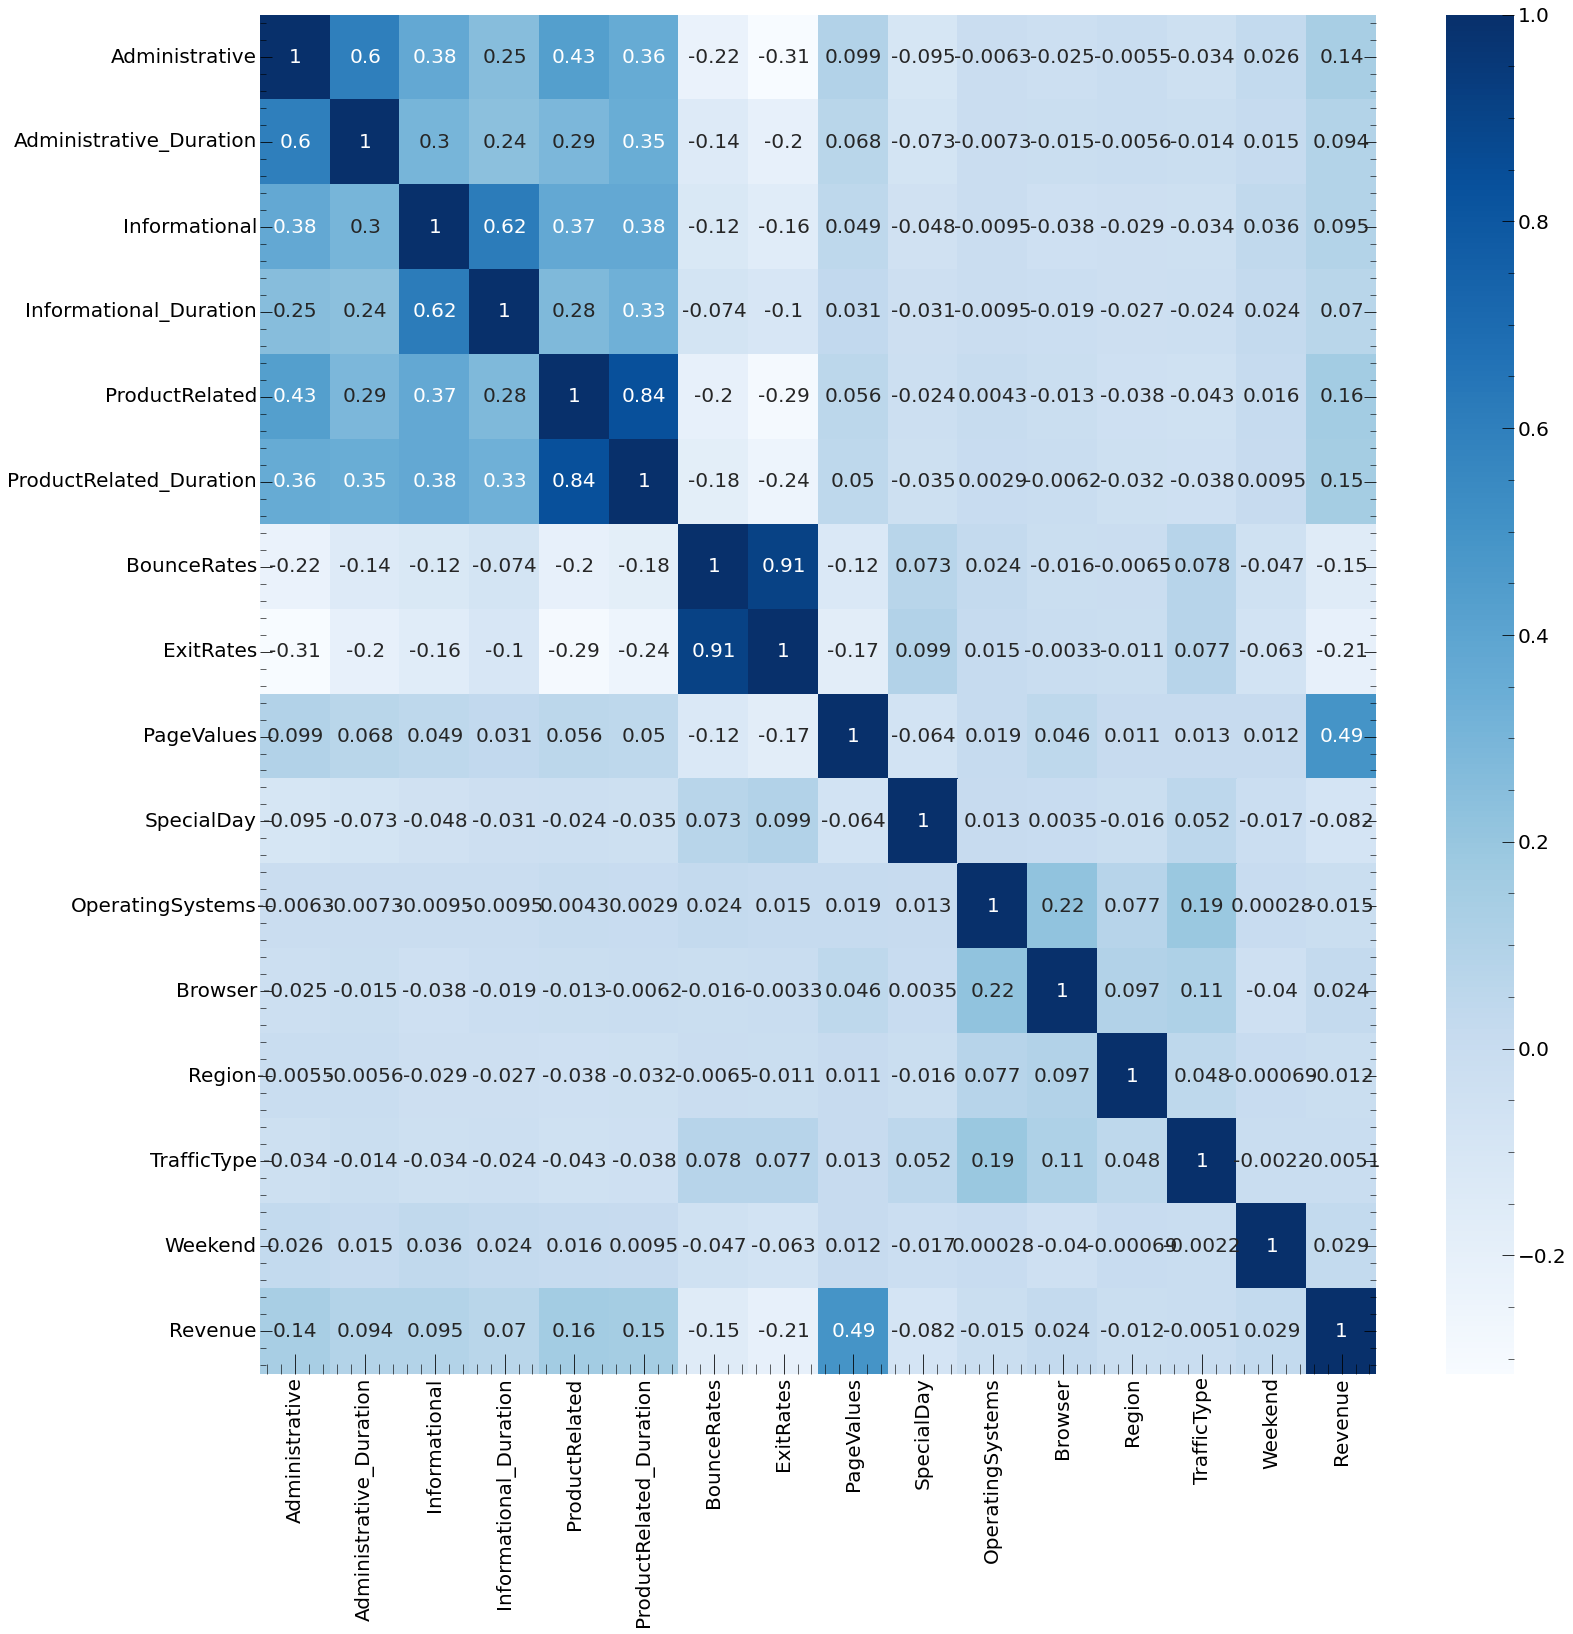

In [173]:
corr = data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr, cmap="Blues", annot=True)